# Assignment Week 8

# Name: Nnaemezue Obi-eyisi

# Class: DATA 620

# Assignment – High Frequency Words

Choose a corpus of interest
I will choose the web text corpus from the nltk library



In [25]:
import nltk
from nltk.corpus import webtext 
import pandas as pd
from nltk import FreqDist
import matplotlib.pyplot as plt
import operator
import seaborn as sns
%matplotlib inline


words = []
for fileid in webtext.fileids():
    words.extend(webtext.words(fileid))


Let's check the total number of words and ensure all words are lower case

In [26]:


words=[s.lower() for s in words]
len(words)


396733

The unique set of words can be gotten by

In [27]:
unique_words = set(words)
print (len(unique_words))

17414


Let's strip out punctuation marks, alphabets and stop words. In our case a word would be defined as characters sets that can be classified as a noun, verb, adjective, pronoun, or adverb in english language according to NLTK library of words



In [28]:



# strip punctuation and numerics using isalpha() method
unique_words = [w for w in unique_words if w.isalpha()]
# strip out stop words
from nltk.corpus import stopwords
unique_words = [w for w in unique_words if w not in stopwords.words('english')]


# How many total unique set of real words are in the corpus
len(set(unique_words))



16303

# Most Common Words and building a Frequency Distribution

In [29]:
# build the frequency distribution using FreqDist()
words = [w for w in words if w.isalpha()]
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words('english')]

freq_words = nltk.FreqDist(words)


Total number of words in corpus

In [30]:
len(freq_words)

16303

In [31]:

# make a dataframe to produce relative frequencies - top n common words
freq_words_top200 = pd.DataFrame(freq_words.most_common(400),columns=['word','count'])
freq_words_top200['rel_freq'] = freq_words_top200['count']/float(len(words))
freq_words_top200['Cum_Sum_rel_freq'] = freq_words_top200['rel_freq'].cumsum()

#get most common words that make up 50 percent of the total words
len(freq_words_top200[freq_words_top200['Cum_Sum_rel_freq']<0.5])




389

We can see that the top 389 words  represent half of the total words in the corpus

# Identify the 200 highest frequency words in this corpus.

In [32]:
top200=freq_words_top200[:200]
top200

,word,count,rel_freq,Cum_Sum_rel_freq
0,girl,2956,0.016813,0.016813
1,guy,2751,0.015647,0.032461
2,like,1696,0.009647,0.042107
3,man,1075,0.006114,0.048222
4,know,1025,0.005830,0.054052
5,woman,998,0.005677,0.059729
6,yeah,895,0.005091,0.064819
7,page,887,0.005045,0.069864
8,firefox,879,0.005000,0.074864
9,get,869,0.004943,0.079807


# The following barplot shows the relative frequencies of all 200 of the most frequent unique words.

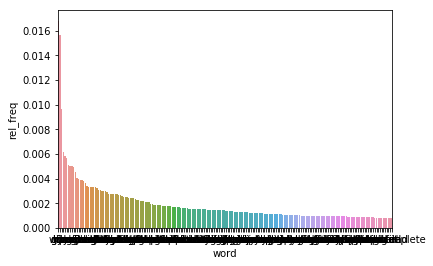

In [33]:
sns.barplot(x=top200.word, y=top200.rel_freq)

# Does the observed relative frequency of these words follow Zipf’s law? Explain.

According to wikipedia "Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n."

This is true as per above graph illustrates
# In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Zipf's law will always apply to all words in all corpora however the most common words might differ